In [1]:
using DifferentialEquations
using Plots
using LinearAlgebra

In [1]:
include("UsefulFunctions.jl")
include("Solvers.jl")
include("PlotFunctions.jl")

PlotPipPlot (generic function with 1 method)

In [9]:
dt = Δt
N1 = T/dt
X = PointsSolutionsJuliaSolver(p, dt, N1, points, RadauIIA5)[1];

dt2 = dt/2
N2 = T/dt2
X2 = PointsSolutionsJuliaSolver(p, dt2, N2, points, RadauIIA5)[1][1:2:end];

dt4 = dt/4
N4 = T/dt4
X4 = PointsSolutionsJuliaSolver(p, dt4, N4, points, RadauIIA5)[1][1:4:end];

dt8 = dt/8
N8 = T/dt8
X8 = PointsSolutionsJuliaSolver(p, dt8, N8, points, RadauIIA5)[1][1:8:end];

dt16 = dt/16
N16 = T/dt16
X16 = PointsSolutionsJuliaSolver(p, dt16, N16, points, RadauIIA5)[1][1:16:end];

dt32 = dt/32
N32 = T/dt32
X32 = PointsSolutionsJuliaSolver(p, dt32, N32, points, RadauIIA5)[1][1:32:end];

dt64 = dt/64
N64 = T/dt64
X64 = PointsSolutionsJuliaSolver(p, dt64, N64, points, RadauIIA5)[1][1:64:end];
N64

640000.0

In [10]:
tvec = [0:dt:T];


corr12 = zeros(1,N+1)
corr24 = zeros(1,N+1)
corr48 = zeros(1,N+1)
corr816 = zeros(1,N+1)
corr1632 = zeros(1,N+1)
corr3264 = zeros(1,N+1)

for i = 1:N+1
    corr12[i] = Correlation(X[:,i],X2[:,i])
    corr24[i] = Correlation(X2[:,i],X4[:,i])
    corr48[i] = Correlation(X4[:,i],X8[:,i])
    corr816[i] = Correlation(X8[:,i],X16[:,i])
    corr1632[i] = Correlation(X16[:,i],X32[:,i])
    corr3264[i] = Correlation(X32[:,i],X64[:,i])
end

size(corr12)


(1, 10001)

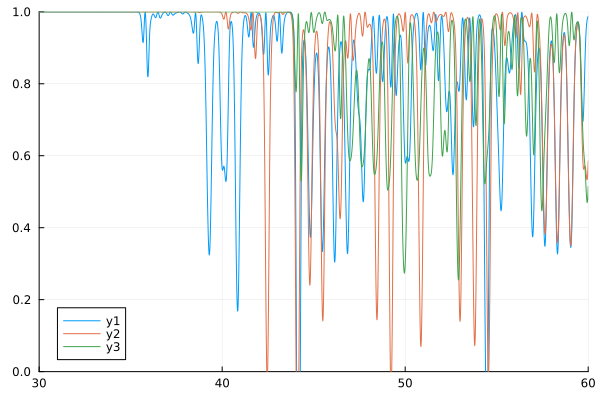

In [21]:
p=plot(tvec,corr816',xlims=(30, 60), ylims=(0,1))
plot!(p,tvec,corr1632')
plot!(p,tvec,corr3264')
display(p)

In [25]:
function CorrelationTimeStep(X₁, X₂, bound)
    N = length(X₁)
    for i = 1:N
        c = Correlation(X₁[:,i], X₂[:,i])
        if c < bound
            return i-1
        end
    end
    return N-1
end

CorrelationTimeStep (generic function with 1 method)

In [36]:
bound = 0.5
n12 = CorrelationTimeStep(X,X2,bound)
n24 = CorrelationTimeStep(X2,X4,bound)
n48 = CorrelationTimeStep(X4,X8,bound)
n816 = CorrelationTimeStep(X8,X16,bound)
n1632 = CorrelationTimeStep(X16,X32,bound)
n3264 = CorrelationTimeStep(X32,X64,bound)

print([n12*dt, n24*dt, n48*dt, n816*dt, n1632*dt, n3264*dt])

[27.900000000000002, 30.96, 34.75, 39.2, 42.35, 49.83]